In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz

In [2]:
df = pd.read_csv('titanic_clean.csv')

In [3]:
df.head()

,Unnamed: 0,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,0,1,0,0,0
1,1,1,1,1,1,0,3,1
2,2,1,3,1,0,0,0,0
3,3,1,1,1,1,0,3,0
4,4,0,3,0,0,0,0,0


In [4]:
X_data= df.drop(['Unnamed: 0', 'Survived'], axis=1) 
X_data.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,1
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0


In [5]:
y_survived= df['Survived']
y_survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_survived, test_size= 0.3, random_state = 42)

In [7]:
dtcModel= DecisionTreeClassifier(criterion = 'entropy', random_state = 0) 
dtcModel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
y_predict = dtcModel.predict(X_test)

In [9]:
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[143  14]
 [ 37  74]]


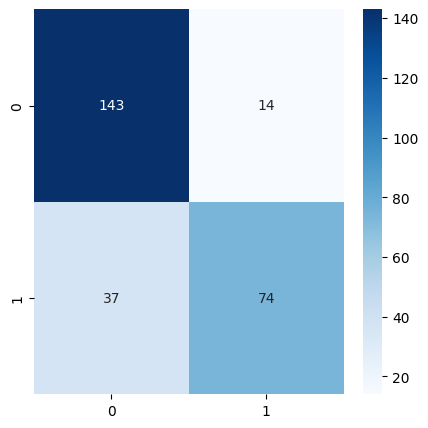

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.show()

In [11]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       157
           1       0.84      0.67      0.74       111

    accuracy                           0.81       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.81      0.81      0.81       268



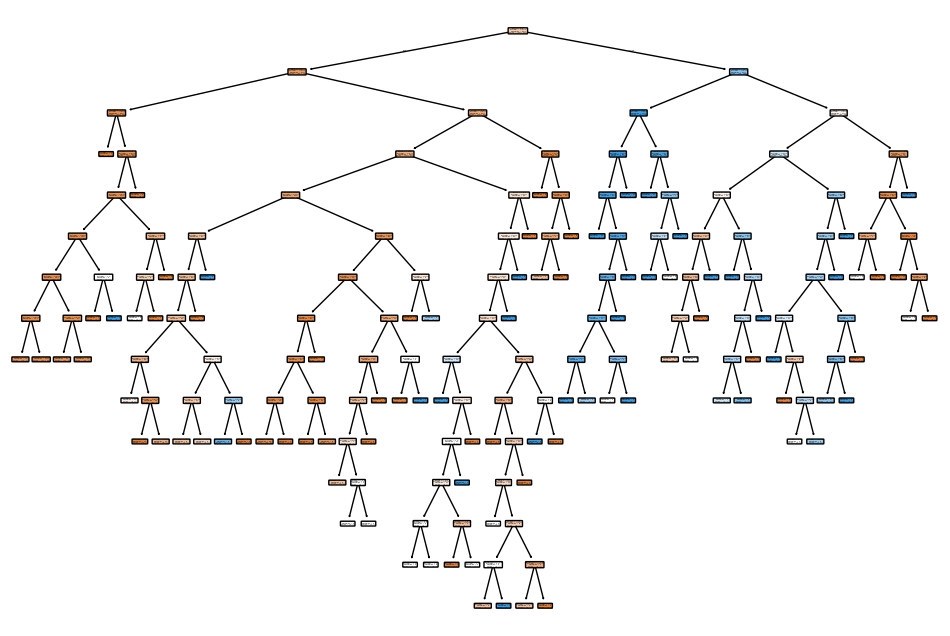

In [12]:
# Visualizar el árbol
from sklearn.tree import export_graphviz
# Obtener los títulos de las columnas
column_titles = list(X_data.columns)

# Visualización del árbol
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dtcModel, filled=True, feature_names=column_titles, rounded=True)
plt.show()



In [14]:
export_graphviz(dtcModel, out_file= 'tree2.dot', feature_names=column_titles)


para visualizar copiar el contenido de archivo .dot en la siguiente url

http://www.webgraphviz.com/?tab=map